<a href="https://colab.research.google.com/github/arezookhalilinasr22/nlp/blob/main/REGandSVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
#from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
!pip install matplotlib-venn

In [4]:
df = pd.read_excel("/content/Folds5x2_pp.xlsx")

In [5]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [6]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.shape

(9568, 5)

In [10]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [12]:
display(train.info)

<bound method DataFrame.info of          AT      V       AP     RH      PE
2272   9.70  40.11  1026.61  75.48  473.97
1569  20.15  39.72  1001.85  59.32  456.87
3689  10.59  41.54  1019.94  72.52  478.74
559    9.18  39.42  1025.41  69.46  473.78
7813  20.90  67.71  1007.16  59.02  446.57
...     ...    ...      ...    ...     ...
5537  25.42  73.17  1012.29  85.86  437.06
4973  24.51  62.08  1022.58  57.44  447.04
1006  26.59  59.92  1009.97  70.09  438.22
1340  19.73  69.51  1013.14  61.84  450.99
8596  12.36  45.09  1013.05  88.40  467.20

[7654 rows x 5 columns]>

In [13]:
display(test.info)

<bound method DataFrame.info of          AT      V       AP     RH      PE
8599  12.03  40.75  1015.93  85.07  474.97
6316  26.06  58.59  1012.41  55.22  451.47
7187  33.59  79.05  1007.79  63.55  436.51
4242  26.55  69.45  1013.92  52.22  434.55
2346  24.65  64.63  1020.52  53.45  446.04
...     ...    ...      ...    ...     ...
5250   9.78  40.03  1017.33  92.11  480.59
8233  26.26  65.06  1013.58  52.72  440.92
3593  15.69  39.30  1019.03  60.57  464.17
289   20.25  57.76  1016.28  77.76  452.66
3575  23.31  68.63  1014.73  51.57  448.20

[1914 rows x 5 columns]>

In [14]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [15]:
test.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [16]:
#harchi null dashtim az imputer estefade mikardim
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
#imputer = Imputer.fit(imputer,X[:,1:3])
#X[:, 1:3] = Imputer.transform(imputer,X[:, 1:3])


In [17]:
x_train = train.iloc[:,1:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,1:-1]
y_test = test.iloc[:,-1]

In [18]:
x_train.head()

,V,AP,RH
2272,40.11,1026.61,75.48
1569,39.72,1001.85,59.32
3689,41.54,1019.94,72.52
559,39.42,1025.41,69.46
7813,67.71,1007.16,59.02


In [19]:
y_train.head()

2272    473.97
1569    456.87
3689    478.74
559     473.78
7813    446.57
Name: PE, dtype: float64

In [20]:
x_test.head()

,V,AP,RH
8599,40.75,1015.93,85.07
6316,58.59,1012.41,55.22
7187,79.05,1007.79,63.55
4242,69.45,1013.92,52.22
2346,64.63,1020.52,53.45


In [21]:
x_train.shape

(7654, 3)

In [22]:
y_train.shape

(7654,)

In [23]:
x_test.shape

(1914, 3)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
x_train_transform = ss.fit_transform(x_train)

In [27]:
#به جای این کد

#sc_X = StandardScaler
#x_train = sc_X.fit_transform(x_train)

#باید کد زیر را استفاده کنید:


#from sklearn.preprocessing import StandardScaler

#sc_X = StandardScaler()
#x_train = sc_X.fit_transform(x_train)

#در اینجا، ما از
#StandardScaler()
 #برای ایجاد یک نمونه از کلاس
#StandardScaler
#استفاده کرده‌ایم و سپس از این نمونه
 #برای انجام مقیاس‌دهی به داده‌های
 #x_train
 #استفاده کرده‌ایم.






In [28]:
x_train_transform

array([[-1.1179866 ,  2.24024002,  0.15129494],
       [-1.14866502, -1.92707846, -0.9556544 ],
       [-1.00549906,  1.11762232, -0.05146311],
       ...,
       [ 0.44031979, -0.56041343, -0.2179165 ],
       [ 1.19469426, -0.02687549, -0.78303606],
       [-0.72624678, -0.04202325,  1.03630642]])

In [29]:
x_test_transform = ss.fit_transform(x_test)

In [30]:
newdf_x_train = pd.DataFrame(x_train_transform)

In [31]:
newdf_x_test = pd.DataFrame(x_test_transform)

In [32]:
y_train

2272    473.97
1569    456.87
3689    478.74
559     473.78
7813    446.57
         ...  
5537    437.06
4973    447.04
1006    438.22
1340    450.99
8596    467.20
Name: PE, Length: 7654, dtype: float64

In [33]:
newdf_x_train

,0,1,2
0,-1.117987,2.240240,0.151295
1,-1.148665,-1.927078,-0.955654
2,-1.005499,1.117622,-0.051463
3,-1.172264,2.038270,-0.261071
4,1.053102,-1.033360,-0.976204
...,...,...,...
7649,1.482599,-0.169938,0.862318
7650,0.610231,1.561957,-1.084433
7651,0.440320,-0.560413,-0.217917
7652,1.194694,-0.026875,-0.783036


In [34]:
newdf_y_train = pd.DataFrame(y_train)

In [35]:
newdf_y_train

,PE
2272,473.97
1569,456.87
3689,478.74
559,473.78
7813,446.57
...,...
5537,437.06
4973,447.04
1006,438.22
1340,450.99


In [36]:
newdf_y_test = pd.DataFrame(y_test)
newdf_y_test

,PE
8599,474.97
6316,451.47
7187,436.51
4242,434.55
2346,446.04
...,...
5250,480.59
8233,440.92
3593,464.17
289,452.66


In [37]:
#in pandas axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns.

In [39]:
#newdf = pd.concat([newdf_x_train, df['PE']], axis=1) #ghalate
newdf = pd.concat([newdf_x_train, newdf_y_train], axis=1)

In [40]:
newdf.head()

,0,1,2,PE
0,-1.117987,2.240240,0.151295,NaN
1,-1.148665,-1.927078,-0.955654,NaN
2,-1.005499,1.117622,-0.051463,488.56
3,-1.172264,2.038270,-0.261071,NaN
4,1.053102,-1.033360,-0.976204,473.90


In [41]:
# importing random forest classifier from assemble module
#from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
#clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
#clf.fit(newdf_x_train, y_train)

# performing predictions on the test dataset
#y_pred = clf.predict(newdf_x_test)

# metrics are used to find accuracy or error
#from sklearn import metrics

# using metrics module for accuracy calculation
#print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [42]:
#randomforest va logesticregression bara tabea hadaf peyvaste nist bara classification ast

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [44]:
regressor = LinearRegression()
regressor.fit(newdf_x_train, y_train)

LinearRegression()

In [53]:
y_pred = regressor.predict(newdf_x_test)
newdf_y_pred = pd.DataFrame(y_pred)

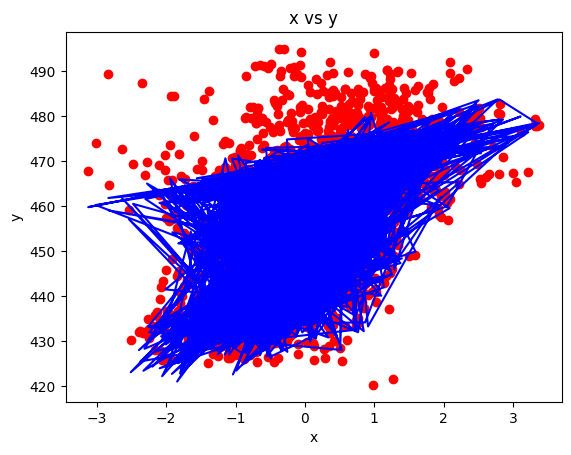

In [104]:
newdf_x_train = np.array(newdf_x_train)
newdf_y_train = np.array(newdf_y_train)
newdf_y_pred = np.array(newdf_y_pred)
newdf_x_test = np.array(newdf_x_test)
plt.scatter(newdf_x_test[:,1:-1], newdf_y_test, color='red')
plt.plot(newdf_x_test[:,1:-1], newdf_y_pred, color = 'blue')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [70]:
len(newdf_x_train)

7654

In [71]:
len(newdf_y_train)

7654

In [72]:
len(newdf_x_test)

1914

In [73]:
len(newdf_y_test)

1914

In [74]:
len(newdf_y_pred)

1914

In [75]:
my_arr = [[1, 2, 3], [4, 5, 6]]

# ✅ get the number of rows
rows = len(my_arr)
print(rows)  # 👉️ 2

# ✅ get the number of columns
cols = len(my_arr[0])
print(cols)  # 👉️ 3

# ✅ get the number of total elements
total_elements = rows * cols
print(total_elements)  # 👉️ 6

2
3
6


In [48]:

newdf_x_train.shape

(7654, 3)

In [49]:
newdf_y_train.shape

(7654, 1)

In [50]:
newdf_x_test.shape

(1914, 3)

In [54]:
newdf_y_pred.shape

(1914, 1)

In [ ]:
y_test.shape

(1914,)

In [56]:
newdf_x_train.head()

,0,1,2
0,-1.117987,2.240240,0.151295
1,-1.148665,-1.927078,-0.955654
2,-1.005499,1.117622,-0.051463
3,-1.172264,2.038270,-0.261071
4,1.053102,-1.033360,-0.976204


In [58]:
x_train.head(10)

,V,AP,RH
2272,40.11,1026.61,75.48
1569,39.72,1001.85,59.32
3689,41.54,1019.94,72.52
559,39.42,1025.41,69.46
7813,67.71,1007.16,59.02
2893,70.04,1009.63,73.22
2737,43.79,1016.17,84.45
1442,43.79,1016.02,79.81
1259,59.80,1016.79,69.02
1221,70.32,1012.20,82.27


In [ ]:
y_train.head()

2194    432.51
5580    444.01
65      441.03
6995    455.87
5217    448.72
Name: PE, dtype: float64

In [ ]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.854934319815875
Mean Squared Error: 57.11732246819202
Root Mean Squared Error: 7.557600311487239


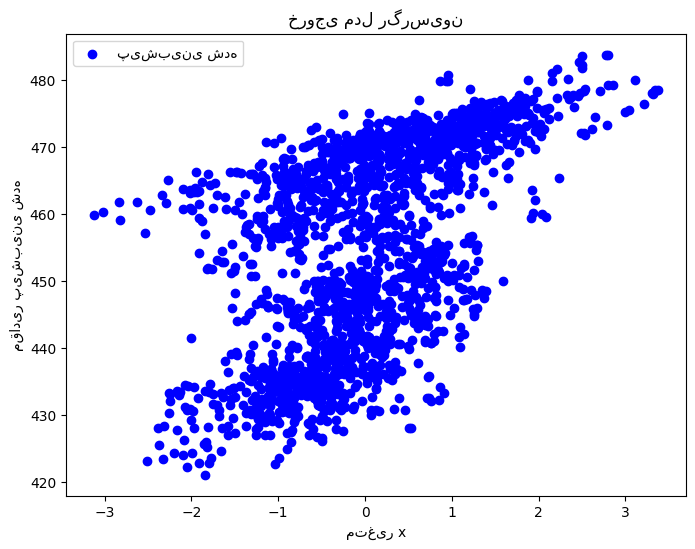

In [102]:
import matplotlib.pyplot as plt

# اطمینان از وجود مقادیر در newdf_y_pred و newdf_x_test
newdf_y_pred = np.array(newdf_y_pred)
newdf_x_test = np.array(newdf_x_test)
# رسم نمودار
plt.figure(figsize=(8, 6))
plt.scatter(newdf_x_test[:,1:-1].astype('float'), newdf_y_pred, color='blue', label='پیش‌بینی شده')

# تنظیمات نمودار
plt.title('خروجی مدل رگرسیون')
plt.xlabel('متغیر x')
plt.ylabel('مقادیر پیش‌بینی شده')
plt.legend()

# نمایش نمودار
plt.show()

In [ ]:
#اگر newdf_x_test یک دیتافریم با دو سطر و سه ستون باشد:

#       A  B  C
#0   1  2  3
#1   4  5  6

#آنگاه newdf_x_test[:, 1:-1] به شکل زیر است:


#       B
#0   2
#1   5

#در این مثال، ستون‌های B انتخاب شده‌اند.

In [100]:
newdf_x_test[:,1:-1]

array([[ 0.4782974 ],
       [-0.11592664],
       [-0.8958457 ],
       ...,
       [ 1.00161971],
       [ 0.53738218],
       [ 0.27572102]])

In [88]:
newdf_x_test[0]

array([-1.06333821,  0.4782974 ,  0.79512786])

In [ ]:
from sklearn.svm import SVR

In [ ]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_excel('/content/Folds5x2_pp.xlsx')
X = dataset.iloc[:,1:-1].values.astype(float)
y = dataset.iloc[:,:-1].values.astype(float)

In [105]:
#3 Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(newdf_x_train)
#y = sc_y.fit_transform(y_train)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR

In [106]:
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR.
# We have a non-linear condition
#so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(newdf_x_train,newdf_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [119]:
#5 Predicting a new result
y_pred = regressor.predict(newdf_x_test)

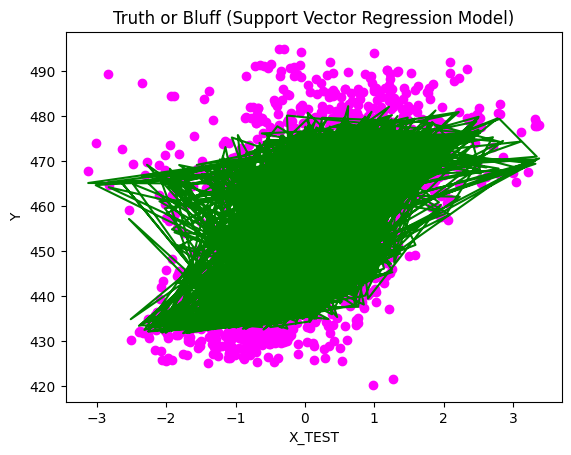

In [112]:
plt.scatter(newdf_x_test[:,1:-1], newdf_y_test, color = 'magenta')
plt.plot(newdf_x_test[:,1:-1], regressor.predict(newdf_x_test), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('X_TEST')
plt.ylabel('Y')
plt.show()

In [120]:
#https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d